### This notebook involves the Clustering of Restaurants based on CUISINES, SPECIAL DIETS, Meals, & FEATURES in the dataset.

>  **import required libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import requests
import json
#import folium
import warnings
warnings.filterwarnings('ignore')

>  **Read the dataset**

In [6]:
df  = pd.read_csv('RestaurantsFinalDataset_modified (1).csv')
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,Name,Location,Address,PRICE RANGE,CUISINES,SPECIAL DIETS,Meals,FEATURES,Link
0,Playtrix Sports Bar and Cafe,137 Sir James Pieris Mawatha Colombo City Cent...,Sir James Pieris Mawatha Colombo City Centre M...,"LKR 500 - LKR 1,400","American, Gastropub, Sri Lankan",Vegetarian Friendly,"Lunch, Dinner, Late Night","Takeout, Reservations, Seating, Parking Availa...",https://www.tripadvisor.com/Restaurant_Review-...
1,King of the Mambo,"Galle Face Hotel, Colombo 00300 Sri Lanka","Galle Face Hotel, Colombo 00300","LKR 2,000 - LKR 30,000","Seafood, International, Grill, Cuban, Latin, Bar","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Brunch","Reservations, Seating, Validated Parking, Serv...",https://www.tripadvisor.com/Restaurant_Review-...
2,Sapphyr Lounge,"02 No 01 Galle Face Shangri-La Hotel Colombo, ...","Galle Face Shangri-La Hotel Colombo, Colombo 0...","LKR 2,000 - LKR 5,000","Cafe, International","Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Drinks","Reservations, Seating, Parking Available, Vali...",https://www.tripadvisor.com/Restaurant_Review-...
3,Shang Palace,"02 1 Galle Face Shangri-La Hotel, Colombo 0020...","Galle Face Shangri-La Hotel, Colombo 00200","LKR 2,000 - LKR 30,000",Chinese,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Takeout, Reservations, Private Dining, Seating...",https://www.tripadvisor.com/Restaurant_Review-...
4,"The Ocean, The Kingsbury","48 Janadhipathi Mawatha,, Colombo Sri Lanka","Janadhipathi Mawatha,, Colombo","LKR 500 - LKR 30,000","Seafood, Asian, Sri Lankan",Gluten Free Options,"Lunch, Dinner, Late Night","Reservations, Seating, Parking Available, Vali...",https://www.tripadvisor.com/Restaurant_Review-...


In [7]:
duplicates = df.duplicated(keep=False)
df = df[~duplicates]
df = df.reset_index(drop=True)
df.shape

(486, 9)

In [8]:
lat = []
long = []
for i in range(0,len(df)):
  address = df.Address[i]
  response = requests.get("https://api.opencagedata.com/geocode/v1/json?q={}&key=8fa09a5e06e945c2ab88aa43b408f033".format(address))
  data = json.loads(response.text)
  try:
    lat_value = data['results'][0]['geometry']['lat']
    lng_value = data['results'][0]['geometry']['lng']
    lat.append(lat_value)
    long.append(lng_value)
  except:
    lat.append(np.nan)
    long.append(np.nan)

KeyboardInterrupt: 

In [5]:
# Add Latitude, & Longitude features to the dataframe
df['Latitude'] = lat
df['Longitude'] = long
df.head()

,Name,Location,Address,PRICE RANGE,CUISINES,SPECIAL DIETS,Meals,FEATURES,Link,Latitude,Longitude
0,Playtrix Sports Bar and Cafe,137 Sir James Pieris Mawatha Colombo City Cent...,Sir James Pieris Mawatha Colombo City Centre M...,"LKR 500 - LKR 1,400","American, Gastropub, Sri Lankan",Vegetarian Friendly,"Lunch, Dinner, Late Night","Takeout, Reservations, Seating, Parking Availa...",https://www.tripadvisor.com/Restaurant_Review-...,6.916700,79.850000
1,King of the Mambo,"Galle Face Hotel, Colombo 00300 Sri Lanka","Galle Face Hotel, Colombo 00300","LKR 2,000 - LKR 30,000","Seafood, International, Grill, Cuban, Latin, Bar","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Brunch","Reservations, Seating, Validated Parking, Serv...",https://www.tripadvisor.com/Restaurant_Review-...,6.920301,79.846261
2,Sapphyr Lounge,"02 No 01 Galle Face Shangri-La Hotel Colombo, ...","Galle Face Shangri-La Hotel Colombo, Colombo 0...","LKR 2,000 - LKR 5,000","Cafe, International","Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Drinks","Reservations, Seating, Parking Available, Vali...",https://www.tripadvisor.com/Restaurant_Review-...,6.916700,79.850000
3,Shang Palace,"02 1 Galle Face Shangri-La Hotel, Colombo 0020...","Galle Face Shangri-La Hotel, Colombo 00200","LKR 2,000 - LKR 30,000",Chinese,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Takeout, Reservations, Private Dining, Seating...",https://www.tripadvisor.com/Restaurant_Review-...,6.916700,79.850000
4,"The Ocean, The Kingsbury","48 Janadhipathi Mawatha,, Colombo Sri Lanka","Janadhipathi Mawatha,, Colombo","LKR 500 - LKR 30,000","Seafood, Asian, Sri Lankan",Gluten Free Options,"Lunch, Dinner, Late Night","Reservations, Seating, Parking Available, Vali...",https://www.tripadvisor.com/Restaurant_Review-...,6.932970,79.842543


In [9]:
# Check df columns
df.columns

Index(['Name', 'Location', 'Address', 'PRICE RANGE', 'CUISINES',
       'SPECIAL DIETS', 'Meals', 'FEATURES', 'Link'],
      dtype='object')

In [10]:
df.shape

(486, 9)

In [11]:
# Save pre-processed dataset in csv file
df.to_csv('Restaurants_preprocessed1.csv',index=False)

In [12]:
df_new = pd.read_csv('Restaurants_preprocessed1.csv')
df_new

,Name,Location,Address,PRICE RANGE,CUISINES,SPECIAL DIETS,Meals,FEATURES,Link
0,Playtrix Sports Bar and Cafe,137 Sir James Pieris Mawatha Colombo City Cent...,Sir James Pieris Mawatha Colombo City Centre M...,"LKR 500 - LKR 1,400","American, Gastropub, Sri Lankan",Vegetarian Friendly,"Lunch, Dinner, Late Night","Takeout, Reservations, Seating, Parking Availa...",https://www.tripadvisor.com/Restaurant_Review-...
1,King of the Mambo,"Galle Face Hotel, Colombo 00300 Sri Lanka","Galle Face Hotel, Colombo 00300","LKR 2,000 - LKR 30,000","Seafood, International, Grill, Cuban, Latin, Bar","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Brunch","Reservations, Seating, Validated Parking, Serv...",https://www.tripadvisor.com/Restaurant_Review-...
2,Sapphyr Lounge,"02 No 01 Galle Face Shangri-La Hotel Colombo, ...","Galle Face Shangri-La Hotel Colombo, Colombo 0...","LKR 2,000 - LKR 5,000","Cafe, International","Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Drinks","Reservations, Seating, Parking Available, Vali...",https://www.tripadvisor.com/Restaurant_Review-...
3,Shang Palace,"02 1 Galle Face Shangri-La Hotel, Colombo 0020...","Galle Face Shangri-La Hotel, Colombo 00200","LKR 2,000 - LKR 30,000",Chinese,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Takeout, Reservations, Private Dining, Seating...",https://www.tripadvisor.com/Restaurant_Review-...
4,"The Ocean, The Kingsbury","48 Janadhipathi Mawatha,, Colombo Sri Lanka","Janadhipathi Mawatha,, Colombo","LKR 500 - LKR 30,000","Seafood, Asian, Sri Lankan",Gluten Free Options,"Lunch, Dinner, Late Night","Reservations, Seating, Parking Available, Vali...",https://www.tripadvisor.com/Restaurant_Review-...
...,...,...,...,...,...,...,...,...,...
481,The Chaat Company,"5 Rohini Road, Colombo 00600 Sri Lanka","Rohini Road, Colombo 00600","LKR†1,500 - LKR†2,500","Indian, Asian, Sri Lankan","Vegetarian Friendly, Vegan Options","Lunch, Dinner","Seating, Table Service",https://www.tripadvisor.com/Restaurant_Review-...
482,Malar Cafe,"Cww Kanangara Mawatha, Colombo Sri Lanka","Cww Kanangara Mawatha, Colombo","LKR†1,500 - LKR†2,500","Asian, Sri Lankan","Vegetarian Friendly, Vegan Options","Lunch, Dinner","Seating, Table Service",https://www.tripadvisor.com/Restaurant_Review-...
483,Bombay Sweet Centre,"161 Galle Road, Colombo Sri Lanka","Galle Road, Colombo","LKR†1,500 - LKR†2,500","Asian, Sri Lankan","Vegetarian Friendly, Vegan Options","Lunch, Dinner","Seating, Table Service",https://www.tripadvisor.com/Restaurant_Review-...
484,The Biryani Restaurant,"No 33 Armour Street Junction, Colombo Sri Lanka","Armour Street Junction, Colombo","LKR†1,500 - LKR†2,500",Indian,"Vegetarian Friendly, Vegan Options","Lunch, Dinner","Delivery, Takeout, Reservations, Private Dinin...",https://www.tripadvisor.com/Restaurant_Review-...


> **Date pre-processing**

In [13]:
# Strip white spaces & replace some words
df_new['FEATURES'] = df_new['FEATURES'].str.strip()
df_new['FEATURES'] = df_new['FEATURES'].str.replace('TTakeout','Takeout',regex=False)
df_new['FEATURES'] = df_new['FEATURES'].str.replace('Takeout\nI','Takeout')
df_new['FEATURES'] = df_new['FEATURES'].str.replace('Waterfron','Waterfront')
df_new['FEATURES'] = df_new['FEATURES'].str.replace('Waterfrontt','Waterfront')
df_new['SPECIAL DIETS'] = df_new['SPECIAL DIETS'].str.replace('nonVeg','Nonveg')

In [14]:
# Check null values
df_new.isnull().sum()

Name             0
Location         0
Address          0
PRICE RANGE      0
CUISINES         0
SPECIAL DIETS    0
Meals            0
FEATURES         0
Link             0
dtype: int64

> **Define a function to extract unique items from dataset features.**

In [15]:
def unique_items(df):
  unique_list = []
  for i in df.unique():
    string_split = i.split(',')
    for j in string_split:
      if not j in unique_list:
        unique_list.append(j)
  unique_list = [x.strip(' ') for x in unique_list]
  unique_list =set(unique_list)
  unique_list = list(set(unique_list))
  return unique_list

In [16]:
# Extract unique_cuisines
unique_cuisines = unique_items(df_new['CUISINES'])
# Remove following elements from list as not needed for clustering
r_list = ['Vegetarian Friendly','Vegan Options','Gluten Free Options']
for i in r_list:
    unique_cuisines.remove(i)
unique_cuisines

['Southern-Italian',
 'Japanese Fusion',
 'Korean',
 'Indonesian',
 'Middle Eastern',
 'Central-Italian',
 'Diner',
 'Steakhouse',
 'Pizza',
 'Southwestern',
 'Wine Bar',
 'Cajun & Creole',
 'Bar',
 'Latin',
 'Seafood',
 'Scottish',
 'Mexican',
 'Singaporean',
 'Central European',
 'Spanish',
 'Deli',
 'Cafe',
 'Barbecue',
 'Gastropub',
 'Italian',
 'Mongolian',
 'Vietnamese',
 'Thai',
 'International',
 'French',
 'Contemporary',
 'Polynesian',
 'German',
 'Afghani',
 'Street Food',
 'Lebanese',
 'Australian',
 'Cuban',
 'Pub',
 'Soups',
 'Fusion',
 'Moroccan',
 'Caribbean',
 'Dining bars',
 'Sushi',
 'Sri Lankan',
 'Portuguese',
 'Malaysian',
 'Asian',
 'British',
 'Mediterranean',
 'Turkish',
 'Healthy',
 'Indian',
 'Irish',
 'Pakistani',
 'Arabic',
 'Sicilian',
 'Japanese',
 'African',
 'Fast Food',
 'Beer restaurants',
 'Fujian',
 'Chinese',
 'European',
 'American',
 'Grill']

In [17]:
print('Number of unique cuisines in our dataset: {}'.format(len(unique_cuisines)))

Number of unique cuisines in our dataset: 67


In [18]:
# Extract unique_features
unique_features = unique_items(df_new['FEATURES'])
# Remove 'akeout', & '有泊車位' from unique_features
for i in ['akeout','有泊車位']:
    unique_features.remove(i)
unique_features

['Dog Friendly',
 'Gift Cards Available',
 'Serves Alcohol',
 'Digital Payments',
 'Accepts Credit Cards',
 'Buffet',
 'Accepts Mastercard',
 'BYOB',
 'Live Music',
 'Family style',
 'Table Service',
 'Takeout',
 'Wheelchair Accessible',
 'Wine and Beer',
 'Full Bar',
 'Accepts Discover',
 'Cash Only',
 'Free off-street parking',
 'Valet Parking',
 'Private Dining',
 'Delivery',
 'Accepts Visa',
 'Television',
 'Highchairs Available',
 'Validated Parking',
 'Reservations',
 'Jazz Bar',
 'Non-smoking restaurants',
 'Free Wifi',
 'Accepts American Express',
 'Street Parking',
 'Beach',
 'Parking Available',
 'Outdoor Seating',
 'Waterfront',
 'Seating']

In [19]:
print('Number of unique features in our dataset: {}'.format(len(unique_features)))

Number of unique features in our dataset: 36


In [20]:
# Extract unique_specialdiets
unique_specialdiets = unique_items(df_new['SPECIAL DIETS'])
unique_specialdiets

['Halal',
 'Vegetarian Friendly',
 'Kosher',
 'Nonveg',
 'Vegan Options',
 'Gluten Free Options']

In [21]:
print('Number of unique special diets in our dataset: {}'.format(len(unique_specialdiets)))

Number of unique special diets in our dataset: 6


In [22]:
# Extract unique_meals
unique_meals = unique_items(df_new['Meals'])
# Remove Table Service, Seating, Takeout
for i in ['Table Service','Seating','Takeout']:
    unique_meals.remove(i)
unique_meals

['Drinks', 'Late Night', 'Lunch', 'Breakfast', 'Brunch', 'Dinner']

In [23]:
print('Number of unique meals in our dataset: {}'.format(len(unique_meals)))

Number of unique meals in our dataset: 6


In [24]:
# create a column for each cuisine in unique_cuisines. If cuisine is present in the cuisines feature it will return 1 else 0 like one hot coding
for cuisine in unique_cuisines:
    df_new.loc[df_new['CUISINES'].str.contains(cuisine,regex=True), cuisine] = 1
    df_new.loc[~df_new['CUISINES'].str.contains(cuisine,regex=True), cuisine] = 0
    df_new[cuisine] = df_new[cuisine].astype('uint8')

In [25]:
# create a column for each feature in unique_features. If feature is present in the FEATURES column it will return 1 else 0 like one hot coding
for feature in unique_features:
    df_new.loc[df_new['FEATURES'].str.contains(feature,regex=True), feature] = 1
    df_new.loc[~df_new['FEATURES'].str.contains(feature,regex=True), feature] = 0
    df_new[feature] = df_new[feature].astype('uint8')

In [26]:
# create a column for each specialdiet in unique_specialdiets. If specialdiet is present in the SPECIAL DIETS column it will return 1 else 0 like one hot coding
for sd in unique_specialdiets:
    df_new.loc[df_new['SPECIAL DIETS'].str.contains(sd,regex=True), sd] = 1
    df_new.loc[~df_new['SPECIAL DIETS'].str.contains(sd,regex=True), sd] = 0
    df_new[sd] = df_new[sd].astype('uint8')

In [27]:
# create a column for each meal in unique_meals. If meal is present in the MEALS column it will return 1 else 0 like one hot coding
for meal in unique_meals:
    df_new.loc[df_new['Meals'].str.contains(meal,regex=True), meal] = 1
    df_new.loc[~df_new['Meals'].str.contains(meal,regex=True), meal] = 0
    df_new[meal] = df_new[meal].astype('uint8')

In [28]:
df_new.head()

,Name,Location,Address,PRICE RANGE,CUISINES,SPECIAL DIETS,Meals,FEATURES,Link,Southern-Italian,...,Kosher,Nonveg,Vegan Options,Gluten Free Options,Drinks,Late Night,Lunch,Breakfast,Brunch,Dinner
0,Playtrix Sports Bar and Cafe,137 Sir James Pieris Mawatha Colombo City Cent...,Sir James Pieris Mawatha Colombo City Centre M...,"LKR 500 - LKR 1,400","American, Gastropub, Sri Lankan",Vegetarian Friendly,"Lunch, Dinner, Late Night","Takeout, Reservations, Seating, Parking Availa...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,0,0,0,0,1,1,0,0,1
1,King of the Mambo,"Galle Face Hotel, Colombo 00300 Sri Lanka","Galle Face Hotel, Colombo 00300","LKR 2,000 - LKR 30,000","Seafood, International, Grill, Cuban, Latin, Bar","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Brunch","Reservations, Seating, Validated Parking, Serv...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,0,1,1,0,0,1,0,1,1
2,Sapphyr Lounge,"02 No 01 Galle Face Shangri-La Hotel Colombo, ...","Galle Face Shangri-La Hotel Colombo, Colombo 0...","LKR 2,000 - LKR 5,000","Cafe, International","Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Drinks","Reservations, Seating, Parking Available, Vali...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,0,1,1,1,0,1,1,0,1
3,Shang Palace,"02 1 Galle Face Shangri-La Hotel, Colombo 0020...","Galle Face Shangri-La Hotel, Colombo 00200","LKR 2,000 - LKR 30,000",Chinese,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Takeout, Reservations, Private Dining, Seating...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,0,1,1,0,0,1,0,0,1
4,"The Ocean, The Kingsbury","48 Janadhipathi Mawatha,, Colombo Sri Lanka","Janadhipathi Mawatha,, Colombo","LKR 500 - LKR 30,000","Seafood, Asian, Sri Lankan",Gluten Free Options,"Lunch, Dinner, Late Night","Reservations, Seating, Parking Available, Vali...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,0,0,1,0,1,1,0,0,1


In [29]:
unique_price_range = df_new['PRICE RANGE'].unique()

In [30]:
unique_price_range 

array(['LKR 500 - LKR 1,400', 'LKR 2,000 - LKR 30,000',
       'LKR 2,000 - LKR 5,000', 'LKR 500 - LKR 30,000',
       'LKR 1,000 - LKR 30,500', 'LKR 989 - LKR 118,694',
       'LKR 3,363 - LKR 5,935', 'LKR 200 - LKR 1,500',
       'LKR 1,978 - LKR 39,565', 'LKR 5000 - LKR 34,000',
       'LKR 1000 - LKR 34,000', 'LKR 1000 - LKR 30 000',
       'LKR 500 - LKR 10,000', 'LKR 989 - LKR 2,967',
       'LKR 600 - LKR 2,500', 'LKR 989 - LKR 3,956',
       'LKR 500 - LKR 40,000', 'LKR 8 - LKR 500', 'LKR 1,978 - LKR 2,967',
       'LKR 3,956 - LKR 9,891', 'LKR 2,967 - LKR 6,924',
       'LKR 2,374 - LKR 10,287', 'LKR 396 - LKR 2,374',
       'LKR 2,967 - LKR 7,913', 'LKR 791 - LKR 2,967', 'LKR 7 - LKR 10',
       'LKR 6 - LKR 9', 'LKR 1,187 - LKR 6,924', 'LKR 2,967 - LKR 14,837',
       'LKR 6,924 - LKR 39,565', 'LKR 2,967 - LKR 3,956',
       'LKR 5,935 - LKR 15,826', 'LKR 2,967 - LKR 8,902',
       'LKR 15 - LKR 20', 'LKR 2,500 - LKR 6,000',
       'LKR 1,780 - LKR 5,935', 'LKR 200 - LKR 2,0

In [31]:
# Replace LKR & † by space
df_new['PRICE RANGE'] = df_new['PRICE RANGE'].str.replace('LKR','')
df_new['PRICE RANGE'] = df_new['PRICE RANGE'].str.replace('†','')

In [32]:
# Split by '-'
df_new['PRICE RANGE'] = df_new['PRICE RANGE'].str.split('-')

In [33]:
df_new['PRICE RANGE'][1][1]

'  30,000'

In [34]:
# Define 'Budget' feature based on PRICE RANGE using Maximum value. Budget has classes viz., Low, Medium, & High.
df_new['Budget'] = [df_new['PRICE RANGE'][i][1] for i in range(0,len(df_new))]

In [35]:
df_new['Budget'] = df_new['Budget'].str.replace(" ","")

In [36]:
df_new['Budget'] = df_new['Budget'].str.replace(',','').str.strip()

In [37]:
df_new['Budget'] = df_new['Budget'].astype('uint32')

In [38]:
# Encode Budget values in Low, Medium, & High
# Low if Budget <= 5000 LKR, Medium if 5000< Budget <= 50000 LKR, & High if Budget > 50000 LKR
# Define a function
def budget_classes(val):
    if val <=5000:
        return 'Low'
    elif 5000<val<=50000:
        return 'Medium'
    else:
        return 'High'
df_new['Budget'] = df_new['Budget'].apply(lambda x : budget_classes(x))

In [39]:
# Apply one-hot coding to Budget column
# create a column for each class in Budget. If class is present in the Budget column it will return 1 else 0 like one hot coding
for val in ['Low','Medium','High']:
    df_new.loc[df_new['Budget'].str.contains(val,regex=True), val] = 1
    df_new.loc[~df_new['Budget'].str.contains(val,regex=True), val] = 0
    df_new[val] = df_new[val].astype('uint8')

In [40]:
df_new.head()

,Name,Location,Address,PRICE RANGE,CUISINES,SPECIAL DIETS,Meals,FEATURES,Link,Southern-Italian,...,Drinks,Late Night,Lunch,Breakfast,Brunch,Dinner,Budget,Low,Medium,High
0,Playtrix Sports Bar and Cafe,137 Sir James Pieris Mawatha Colombo City Cent...,Sir James Pieris Mawatha Colombo City Centre M...,"[ 500 , 1,400]","American, Gastropub, Sri Lankan",Vegetarian Friendly,"Lunch, Dinner, Late Night","Takeout, Reservations, Seating, Parking Availa...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,1,1,0,0,1,Low,1,0,0
1,King of the Mambo,"Galle Face Hotel, Colombo 00300 Sri Lanka","Galle Face Hotel, Colombo 00300","[ 2,000 , 30,000]","Seafood, International, Grill, Cuban, Latin, Bar","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Brunch","Reservations, Seating, Validated Parking, Serv...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,0,1,0,1,1,Medium,0,1,0
2,Sapphyr Lounge,"02 No 01 Galle Face Shangri-La Hotel Colombo, ...","Galle Face Shangri-La Hotel Colombo, Colombo 0...","[ 2,000 , 5,000]","Cafe, International","Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Drinks","Reservations, Seating, Parking Available, Vali...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,1,0,1,1,0,1,Low,1,0,0
3,Shang Palace,"02 1 Galle Face Shangri-La Hotel, Colombo 0020...","Galle Face Shangri-La Hotel, Colombo 00200","[ 2,000 , 30,000]",Chinese,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Takeout, Reservations, Private Dining, Seating...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,0,1,0,0,1,Medium,0,1,0
4,"The Ocean, The Kingsbury","48 Janadhipathi Mawatha,, Colombo Sri Lanka","Janadhipathi Mawatha,, Colombo","[ 500 , 30,000]","Seafood, Asian, Sri Lankan",Gluten Free Options,"Lunch, Dinner, Late Night","Reservations, Seating, Parking Available, Vali...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,1,1,0,0,1,Medium,0,1,0


In [41]:
df_new.shape

(486, 128)

In [42]:
# Save pre-processed data
df_new.to_csv('Restaurants_preprocessed.csv',index=False)

In [43]:
# Drop columns which are not required for clustering
drop_cols = df_new.columns[:9]
df_final = df_new.drop(drop_cols,axis=1)
#df_final = df_final.drop(['Latitude','Longitude','Budget'],axis=1)
df_final = df_final.drop('Budget',axis=1)
df_final.head()

,Southern-Italian,Japanese Fusion,Korean,Indonesian,Middle Eastern,Central-Italian,Diner,Steakhouse,Pizza,Southwestern,...,Gluten Free Options,Drinks,Late Night,Lunch,Breakfast,Brunch,Dinner,Low,Medium,High
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,1,0


In [44]:
df_final.shape

(486, 118)

### K-Means Clustering

### Elbow method for choosing optimum number of clusters

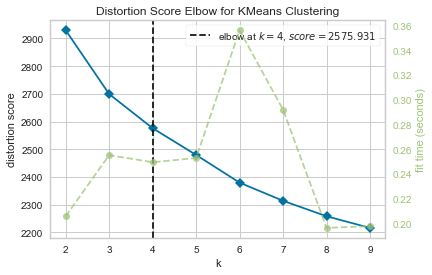

In [45]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model, k=(2,10))
# Fit the data to the visualizer
visualizer.fit(df_final.values)
# Finalize and render the figure
visualizer.show() 

From Elbow method, we found 4 optinum number of clusters.

Silhouette Coefficient


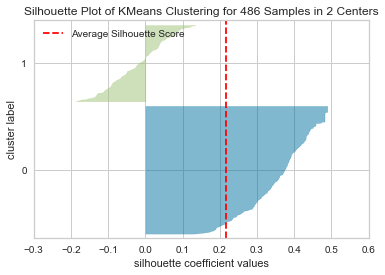

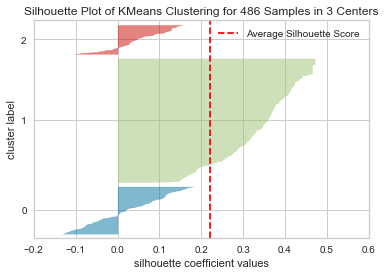

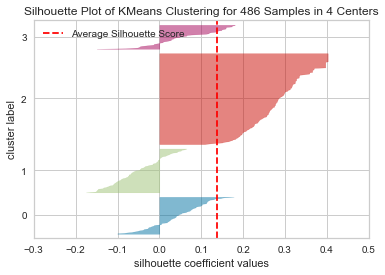

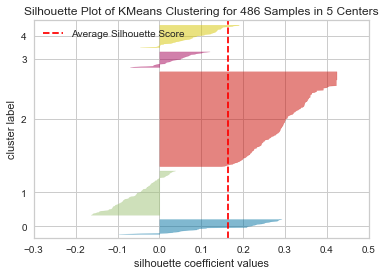

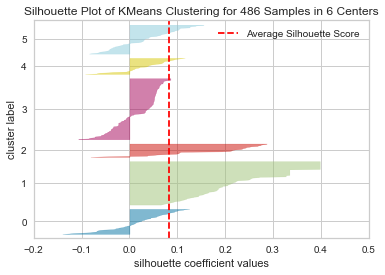

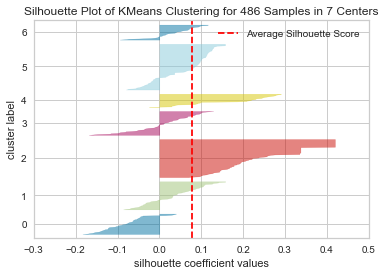

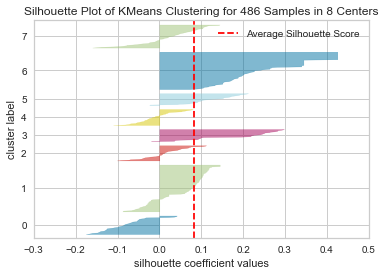

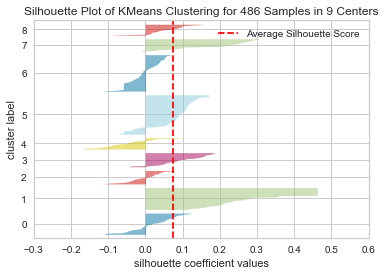

In [46]:
for i in range(2,10):
    model = KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(df_final.values)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

In [47]:
from sklearn.metrics import  silhouette_score
for i in range(2,10):
    model = KMeans(i, random_state=42)
    cluster_labels = model.fit_predict(df_final.values)
    silhouette_avg = silhouette_score(df_final.values, cluster_labels)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.2167014700573456
For n_clusters = 3 The average silhouette_score is : 0.22193660615363037
For n_clusters = 4 The average silhouette_score is : 0.13743470378766276
For n_clusters = 5 The average silhouette_score is : 0.16382830634433312
For n_clusters = 6 The average silhouette_score is : 0.0825456520386174
For n_clusters = 7 The average silhouette_score is : 0.07890204862590997
For n_clusters = 8 The average silhouette_score is : 0.08197692372139995
For n_clusters = 9 The average silhouette_score is : 0.07403889693261097


Silhouette coefficient is a metric used to findout optimal number of clusters. It's used to decide optimal number of clusters confidentily. Here, we found 3 optimal number of clusters.

In [48]:
%%time
# Initialize the K-means
kmeans_model = KMeans(n_clusters=3,random_state=42)
# Fit & predict the clusters
y_pred_cluster=kmeans_model.fit_predict(df_final)

CPU times: user 290 ms, sys: 165 ms, total: 455 ms
Wall time: 217 ms


In [49]:
from joblib import dump, load
# Pickle the K-Means clustering model
filename = 'K_means.joblib'
dump(kmeans_model, filename)

['K_means.joblib']

> **Frequency of K-Means Clusters**

Text(0,0.5,'Cluster labels')

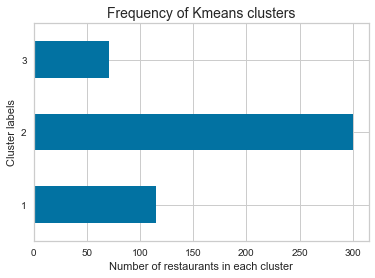

In [50]:
df_kmeans = df_new
df_kmeans["cluster"] = y_pred_cluster+1
df_kmeans.cluster.value_counts().sort_index().plot.barh()
plt.title("Frequency of Kmeans clusters", fontsize = 14)
plt.xlabel("Number of restaurants in each cluster")
plt.ylabel("Cluster labels")

In [51]:
df_kmeans.head()

,Name,Location,Address,PRICE RANGE,CUISINES,SPECIAL DIETS,Meals,FEATURES,Link,Southern-Italian,...,Late Night,Lunch,Breakfast,Brunch,Dinner,Budget,Low,Medium,High,cluster
0,Playtrix Sports Bar and Cafe,137 Sir James Pieris Mawatha Colombo City Cent...,Sir James Pieris Mawatha Colombo City Centre M...,"[ 500 , 1,400]","American, Gastropub, Sri Lankan",Vegetarian Friendly,"Lunch, Dinner, Late Night","Takeout, Reservations, Seating, Parking Availa...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,1,1,0,0,1,Low,1,0,0,3
1,King of the Mambo,"Galle Face Hotel, Colombo 00300 Sri Lanka","Galle Face Hotel, Colombo 00300","[ 2,000 , 30,000]","Seafood, International, Grill, Cuban, Latin, Bar","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Brunch","Reservations, Seating, Validated Parking, Serv...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,1,0,1,1,Medium,0,1,0,1
2,Sapphyr Lounge,"02 No 01 Galle Face Shangri-La Hotel Colombo, ...","Galle Face Shangri-La Hotel Colombo, Colombo 0...","[ 2,000 , 5,000]","Cafe, International","Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Drinks","Reservations, Seating, Parking Available, Vali...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,1,1,0,1,Low,1,0,0,1
3,Shang Palace,"02 1 Galle Face Shangri-La Hotel, Colombo 0020...","Galle Face Shangri-La Hotel, Colombo 00200","[ 2,000 , 30,000]",Chinese,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Takeout, Reservations, Private Dining, Seating...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,1,0,0,1,Medium,0,1,0,1
4,"The Ocean, The Kingsbury","48 Janadhipathi Mawatha,, Colombo Sri Lanka","Janadhipathi Mawatha,, Colombo","[ 500 , 30,000]","Seafood, Asian, Sri Lankan",Gluten Free Options,"Lunch, Dinner, Late Night","Reservations, Seating, Parking Available, Vali...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,1,1,0,0,1,Medium,0,1,0,1


>  **K-means Clustering analysis**

In [82]:
# Create a dataframe for each cluster
df0_kmeans = df_kmeans[df_kmeans['cluster']==1].reset_index(drop=True)
df0_kmeans.to_csv('df0_kmeans.csv', index=False)

df1_kmeans = df_kmeans[df_kmeans['cluster']==2].reset_index(drop=True)
df1_kmeans.to_csv('df1_kmeans.csv', index=False)

df2_kmeans = df_kmeans[df_kmeans['cluster']==3].reset_index(drop=True)
df2_kmeans.to_csv('df2_kmeans.csv', index=False)

Let's check the which are the restaurants in which cluster.

In [53]:
df0_kmeans

,Name,Location,Address,PRICE RANGE,CUISINES,SPECIAL DIETS,Meals,FEATURES,Link,Southern-Italian,...,Late Night,Lunch,Breakfast,Brunch,Dinner,Budget,Low,Medium,High,cluster
0,King of the Mambo,"Galle Face Hotel, Colombo 00300 Sri Lanka","Galle Face Hotel, Colombo 00300","[ 2,000 , 30,000]","Seafood, International, Grill, Cuban, Latin, Bar","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Brunch","Reservations, Seating, Validated Parking, Serv...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,1,0,1,1,Medium,0,1,0,1
1,Sapphyr Lounge,"02 No 01 Galle Face Shangri-La Hotel Colombo, ...","Galle Face Shangri-La Hotel Colombo, Colombo 0...","[ 2,000 , 5,000]","Cafe, International","Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Drinks","Reservations, Seating, Parking Available, Vali...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,1,1,0,1,Low,1,0,0,1
2,Shang Palace,"02 1 Galle Face Shangri-La Hotel, Colombo 0020...","Galle Face Shangri-La Hotel, Colombo 00200","[ 2,000 , 30,000]",Chinese,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Takeout, Reservations, Private Dining, Seating...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,1,0,0,1,Medium,0,1,0,1
3,"The Ocean, The Kingsbury","48 Janadhipathi Mawatha,, Colombo Sri Lanka","Janadhipathi Mawatha,, Colombo","[ 500 , 30,000]","Seafood, Asian, Sri Lankan",Gluten Free Options,"Lunch, Dinner, Late Night","Reservations, Seating, Parking Available, Vali...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,1,1,0,0,1,Medium,0,1,0,1
4,Kings Steakbar,"Janadhipathi Mawatha Kingsbury Hotel, Colombo ...","Janadhipathi Mawatha Kingsbury Hotel, Colombo","[ 2,000 , 30,000]","Bar, European","Gluten Free Options, Vegetarian Friendly","Lunch, Dinner","Reservations, Seating, 有泊車位, Wheelchair Access...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,1,0,0,1,Medium,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,168 Sea Food Palace,"8 Sea View Avenue, Colombo Sri Lanka","Sea View Avenue, Colombo","[ 1000 , 40 000]","Chinese, Seafood, Asian","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Lunch","Reservations, Seating, Table Service, Takeout,...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,1,0,0,1,Medium,0,1,0,1
111,Lattice Lounge,"25 Galle Face Center Road, Colombo Sri Lanka","Galle Face Center Road, Colombo 00300","[ 500 , 40 000]","Chinese, Indian, Barbecue, Thai, Sri Lankan, B...","Vegetarian Friendly, Vegan Options, Gluten Fre...",Dinner,"Table Service, Reservations, Wheelchair Access...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,0,0,0,1,Medium,0,1,0,1
112,Playtrix Sports Bar and Cafe,137 Sir James Pieris Mawatha Colombo City Cent...,Sir James Pieris Mawatha Colombo City Centre M...,"[ 500 , 1,400]","American, Gastropub, Sri Lankan",Vegetarian Friendly,"Breakfast, Lunch, Dinner","Outdoor Seating, Seating, Serves Alcohol, Full...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,0,1,1,0,1,Low,1,0,0,1
113,Cafe Colombo,"L6/5,One Galle Face Mall, 1A, Centre Road, Gal...","Galle Face mall, Colombo 00200","[1,500 , 2,500]","Bar, Seafood, Pub","Vegetarian Friendly, Vegan Options","Breakfast, Lunch, Dinner, Brunch, Late Night, ...","Reservations, Outdoor Seating, Private Dining,...",https://www.tripadvisor.com/Restaurant_Review-...,0,...,1,1,1,1,1,Low,1,0,0,1


In [54]:
# Check cluster 1 features
df0_kmeans[['Name','CUISINES','SPECIAL DIETS','Meals','FEATURES','Budget']]

,Name,CUISINES,SPECIAL DIETS,Meals,FEATURES,Budget
0,King of the Mambo,"Seafood, International, Grill, Cuban, Latin, Bar","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner, Brunch","Reservations, Seating, Validated Parking, Serv...",Medium
1,Sapphyr Lounge,"Cafe, International","Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner, Drinks","Reservations, Seating, Parking Available, Vali...",Low
2,Shang Palace,Chinese,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Dinner","Takeout, Reservations, Private Dining, Seating...",Medium
3,"The Ocean, The Kingsbury","Seafood, Asian, Sri Lankan",Gluten Free Options,"Lunch, Dinner, Late Night","Reservations, Seating, Parking Available, Vali...",Medium
4,Kings Steakbar,"Bar, European","Gluten Free Options, Vegetarian Friendly","Lunch, Dinner","Reservations, Seating, 有泊車位, Wheelchair Access...",Medium
...,...,...,...,...,...,...
110,168 Sea Food Palace,"Chinese, Seafood, Asian","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Lunch","Reservations, Seating, Table Service, Takeout,...",Medium
111,Lattice Lounge,"Chinese, Indian, Barbecue, Thai, Sri Lankan, B...","Vegetarian Friendly, Vegan Options, Gluten Fre...",Dinner,"Table Service, Reservations, Wheelchair Access...",Medium
112,Playtrix Sports Bar and Cafe,"American, Gastropub, Sri Lankan",Vegetarian Friendly,"Breakfast, Lunch, Dinner","Outdoor Seating, Seating, Serves Alcohol, Full...",Low
113,Cafe Colombo,"Bar, Seafood, Pub","Vegetarian Friendly, Vegan Options","Breakfast, Lunch, Dinner, Brunch, Late Night, ...","Reservations, Outdoor Seating, Private Dining,...",Low


In [55]:
# Check cluster 2 features
df1_kmeans[['Name','CUISINES','SPECIAL DIETS','Meals','FEATURES','Budget']]

,Name,CUISINES,SPECIAL DIETS,Meals,FEATURES,Budget
0,Plus Nine Four,"Cafe, Fusion","Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Brunch","Takeout, Outdoor Seating, Seating, Table Servi...",Low
1,Ramen Misoya Colombo,"Japanese, Asian","Vegetarian Friendly, Vegan Options","Lunch, Dinner","Takeout, Reservations, Parking Available, Free...",Low
2,A Minute by Tuk Tuk Colombo,"Bar, Asian, Sri Lankan, Contemporary, Fusion","Vegetarian Friendly, Vegan Options","Lunch, Dinner, Brunch, Late Night, Drinks","Reservations, Seating, Table Service, Serves A...",Low
3,Momo's by Ruvi,"Chinese, Asian","Vegetarian Friendly, Vegan Options","Lunch, Dinner","Takeout, Seating, Wheelchair Accessible, Deliv...",Low
4,Culinary Ceylon,"Sri Lankan, Asian","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Breakfast, Lunch","Reservations, Table Service",Medium
...,...,...,...,...,...,...
295,The Chaat Company,"Indian, Asian, Sri Lankan","Vegetarian Friendly, Vegan Options","Lunch, Dinner","Seating, Table Service",Low
296,Malar Cafe,"Asian, Sri Lankan","Vegetarian Friendly, Vegan Options","Lunch, Dinner","Seating, Table Service",Low
297,Bombay Sweet Centre,"Asian, Sri Lankan","Vegetarian Friendly, Vegan Options","Lunch, Dinner","Seating, Table Service",Low
298,The Biryani Restaurant,Indian,"Vegetarian Friendly, Vegan Options","Lunch, Dinner","Delivery, Takeout, Reservations, Private Dinin...",Low


In [56]:
 # Check cluster 3 features
df2_kmeans[['Name','CUISINES','SPECIAL DIETS','Meals','FEATURES','Budget']]

,Name,CUISINES,SPECIAL DIETS,Meals,FEATURES,Budget
0,Playtrix Sports Bar and Cafe,"American, Gastropub, Sri Lankan",Vegetarian Friendly,"Lunch, Dinner, Late Night","Takeout, Reservations, Seating, Parking Availa...",Low
1,FLOW,Sri Lankan,"Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Dinner","Reservations, Buffet, Seating, Parking Availab...",Medium
2,Oak Ray Flower Drum Restaurant,"Chinese, Asian, Fusion",Vegetarian Friendly,"Lunch, Dinner","Parking Available, Street Parking, Accepts Ame...",Low
3,Cafe Kumbuk,"Cafe, Healthy","Vegetarian Friendly, Vegan Options, Gluten Fre...","Breakfast, Lunch, Brunch, Drinks","Reservations, Outdoor Seating, Seating, Parkin...",Low
4,Sea Fish Restaurant,"International, Sri Lankan, Seafood, Asian","Vegetarian Friendly, Vegan Options, Gluten Fre...","Lunch, Drinks, Dinner, Brunch","Takeout, Outdoor Seating, Seating, Parking Ava...",Medium
...,...,...,...,...,...,...
66,3Brothers Italian Bistro,"Italian, Pizza, Deli","Vegetarian Friendly, Vegan Options, Gluten Fre...","Dinner, Drinks","Delivery, Takeout, Seating, Parking Available,...",Low
67,Fat Panda,"Asian, Thai, Chinese","Vegetarian Friendly, Vegan Options","Breakfast, Lunch, Dinner","Delivery, Takeout, Seating, Parking Available,...",Low
68,Cafe Bagatalle,"American, Cafe, International, Sri Lankan, Asi...","Vegetarian Friendly, Vegan Options","Lunch, Breakfast, Dinner","Outdoor Seating, Seating, Parking Available, V...",Low
69,TosakanthíS Rosat Paan,"Asian, Sri Lankan","Vegetarian Friendly, Vegan Options","Breakfast, Lunch, Dinner, Brunch, Drinks","Delivery, Takeout, Outdoor Seating, Private Di...",Low


>  **Let's check unique items in each feature in cluster 1.**

In [57]:
# unique cuisines in cluster 1
unique0_cuisines = unique_items(df0_kmeans['CUISINES'])
unique0_cuisines

['Southern-Italian',
 'Middle Eastern',
 'American',
 'Diner',
 'Cuban',
 'Steakhouse',
 'Pizza',
 'Pub',
 'Soups',
 'Fusion',
 'Moroccan',
 'Wine Bar',
 'Bar',
 'Latin',
 'Caribbean',
 'Seafood',
 'Mexican',
 'Central European',
 'Cafe',
 'Sushi',
 'Sri Lankan',
 'Gluten Free Options',
 'Barbecue',
 'Malaysian',
 'Asian',
 'Vegetarian Friendly',
 'British',
 'Gastropub',
 'Italian',
 'Mediterranean',
 'Grill',
 'Thai',
 'Healthy',
 'Indian',
 'Irish',
 'International',
 'Arabic',
 'Sicilian',
 'Contemporary',
 'Polynesian',
 'German',
 'Japanese',
 'Vegan Options',
 'Fast Food',
 'Lebanese',
 'Australian',
 'European',
 'Vietnamese',
 'Chinese']

In [58]:
# unique special diets in cluster 1
unique0_SPECIAL_DIETS = unique_items(df0_kmeans['SPECIAL DIETS'])
unique0_SPECIAL_DIETS

['Halal',
 'Vegetarian Friendly',
 'Kosher',
 'Vegan Options',
 'Gluten Free Options']

In [59]:
# unique meals in cluster 1
unique0_Meals = unique_items(df0_kmeans['Meals'])
unique0_Meals

['Late Night', 'Drinks', 'Lunch', 'Breakfast', 'Brunch', 'Dinner']

In [60]:
# unique FEATURES in cluster 1
unique0_FEATURES = unique_items(df0_kmeans['FEATURES'])
unique0_FEATURES

['有泊車位',
 'Dog Friendly',
 'Gift Cards Available',
 'Serves Alcohol',
 'Digital Payments',
 'Accepts Credit Cards',
 'Buffet',
 'Accepts Mastercard',
 'BYOB',
 'Live Music',
 'Family style',
 'Table Service',
 'Takeout',
 'Wheelchair Accessible',
 'Wine and Beer',
 'Full Bar',
 'Free off-street parking',
 'Valet Parking',
 'Private Dining',
 'Delivery',
 'Accepts Visa',
 'Television',
 'Highchairs Available',
 'Validated Parking',
 'Reservations',
 'Jazz Bar',
 'Non-smoking restaurants',
 'Free Wifi',
 'Accepts American Express',
 'Street Parking',
 'Beach',
 'Parking Available',
 'Outdoor Seating',
 'Waterfront',
 'Seating']

>  **Let's check unique items in each feature in cluster 2.**

In [61]:
# unique cuisines in cluster 2
unique1_cuisines = unique_items(df1_kmeans['CUISINES'])
unique1_cuisines

['Japanese Fusion',
 'Korean',
 'Indonesian',
 'Middle Eastern',
 'Central-Italian',
 'Diner',
 'Pizza',
 'Pub',
 'Steakhouse',
 'Soups',
 'Fusion',
 'Southwestern',
 'Cajun & Creole',
 'Wine Bar',
 'Bar',
 'Seafood',
 'Scottish',
 'Mexican',
 'Singaporean',
 'Spanish',
 'Dining bars',
 'Cafe',
 'Sushi',
 'Sri Lankan',
 'Portuguese',
 'Barbecue',
 'Malaysian',
 'Asian',
 'British',
 'Gastropub',
 'Italian',
 'Mediterranean',
 'Grill',
 'Vietnamese',
 'Mongolian',
 'Thai',
 'Turkish',
 'Healthy',
 'Indian',
 'Pakistani',
 'International',
 'Arabic',
 'French',
 'Contemporary',
 'Japanese',
 'German',
 'Afghani',
 'African',
 'Fast Food',
 'Beer restaurants',
 'Street Food',
 'Fujian',
 'Lebanese',
 'European',
 'American',
 'Chinese']

In [62]:
# unique SPECIAL DIETS in cluster 2
unique1_SPECIAL_DIETS = unique_items(df1_kmeans['SPECIAL DIETS'])
unique1_SPECIAL_DIETS

['Vegan Options', 'Halal', 'Vegetarian Friendly', 'Gluten Free Options']

In [63]:
# unique Meals in cluster 2
unique1_Meals = unique_items(df1_kmeans['Meals'])
unique1_Meals

['Drinks',
 'Late Night',
 'Table Service',
 'Takeout',
 'Lunch',
 'Breakfast',
 'Seating',
 'Brunch',
 'Dinner']

In [64]:
# unique FEATURES in cluster 2
unique1_FEATURES = unique_items(df1_kmeans['FEATURES'])
unique1_FEATURES

['Dog Friendly',
 'Wheelchair Accessible',
 'Full Bar',
 'Cash Only',
 'Free off-street parking',
 'Valet Parking',
 'Serves Alcohol',
 'Delivery',
 'Private Dining',
 'Television',
 'Reservations',
 'Accepts Credit Cards',
 'Buffet',
 'Free Wifi',
 'BYOB',
 'Street Parking',
 'Family style',
 'Parking Available',
 'Table Service',
 'Takeout',
 'Outdoor Seating',
 'Seating']

> **Let's check unique items in each feature in cluster 3.**

In [65]:
# unique cuisines in cluster 3
unique2_cuisines = unique_items(df2_kmeans['CUISINES'])
unique2_cuisines

['Middle Eastern',
 'Diner',
 'Pizza',
 'Pub',
 'Steakhouse',
 'Soups',
 'Fusion',
 'Wine Bar',
 'Bar',
 'Seafood',
 'Deli',
 'Cafe',
 'Sushi',
 'Sri Lankan',
 'Barbecue',
 'Asian',
 'Gastropub',
 'Italian',
 'Mediterranean',
 'Thai',
 'Healthy',
 'Indian',
 'International',
 'French',
 'Arabic',
 'Contemporary',
 'Japanese',
 'Fast Food',
 'Lebanese',
 'Chinese',
 'European',
 'American',
 'Grill']

In [66]:
# unique SPECIAL DIETS in cluster 3
unique2_SPECIAL_DIETS = unique_items(df2_kmeans['SPECIAL DIETS'])
unique2_SPECIAL_DIETS

['Halal',
 'Vegetarian Friendly',
 'Nonveg',
 'Vegan Options',
 'Gluten Free Options']

In [67]:
# unique Meals in cluster 3
unique2_Meals = unique_items(df2_kmeans['Meals'])
unique2_Meals

['Late Night', 'Drinks', 'Lunch', 'Breakfast', 'Brunch', 'Dinner']

In [68]:
# unique FEATURES in cluster 3
unique2_FEATURES = unique_items(df2_kmeans['FEATURES'])
unique2_FEATURES

['Wheelchair Accessible',
 'Wine and Beer',
 'Full Bar',
 'Accepts Discover',
 'Cash Only',
 'Free off-street parking',
 'Valet Parking',
 'Serves Alcohol',
 'Private Dining',
 'Delivery',
 'Accepts Visa',
 'Television',
 'Highchairs Available',
 'Validated Parking',
 'Reservations',
 'Outdoor Seating',
 'Seating',
 'Accepts Credit Cards',
 'Buffet',
 'Free Wifi',
 'Accepts American Express',
 'Accepts Mastercard',
 'BYOB',
 'Street Parking',
 'Live Music',
 'Family style',
 'Parking Available',
 'Table Service',
 'Takeout',
 'Digital Payments',
 'akeout']

>  **How unique our clusters are?**

>  **Frequency of unique items in CUISINES**

In [69]:
## Define a function to Count the occurrences of each feature in each Cluster

def count(unique_list,col,df):
    count_list = []
    for feature in unique_list:
        count = df[col].str.contains(feature,regex=True).sum()
        count_list.append(count)
    return count_list

>  ****Frequency of unique cuisines in Cluster 1****

Text(0.5,0,'Occurrences of cuisines')

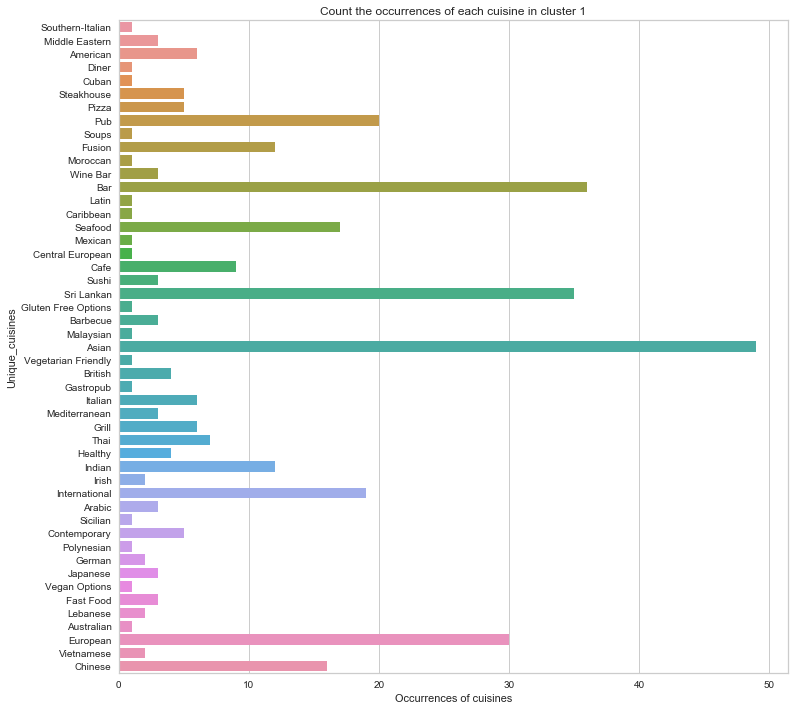

In [70]:
# Count the occurrences of each cuisine in cluster 1
cuisine_count = count(unique0_cuisines,'CUISINES',df0_kmeans)
# Create a dataframe for count & unique1_cuisines
df0_cuisines = pd.DataFrame()
df0_cuisines['unique_cuisines'] = unique0_cuisines
df0_cuisines['cuisine_count'] = cuisine_count
plt.figure(figsize=(12,12))
sns.barplot(x='cuisine_count',y='unique_cuisines',data = df0_cuisines)
plt.title('Count the occurrences of each cuisine in cluster 1')
plt.ylabel('Unique_cuisines')
plt.xlabel('Occurrences of cuisines')

>  **Frequency of unique cuisines in Cluster 2**

Text(0.5,0,'Occurrences of cuisines')

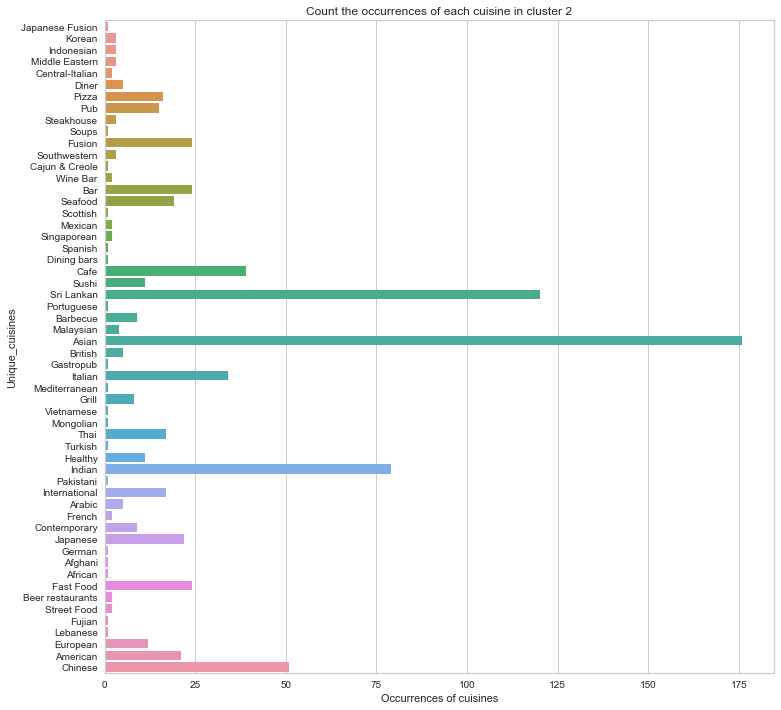

In [71]:
# Count the occurrences of each cuisine in cluster 2
cuisine_count = count(unique1_cuisines,'CUISINES',df1_kmeans)
# Create a dataframe for count & unique2_cuisines
df1_cuisines = pd.DataFrame()
df1_cuisines['unique_cuisines'] = unique1_cuisines
df1_cuisines['cuisine_count'] = cuisine_count
plt.figure(figsize=(12,12))
sns.barplot(x='cuisine_count',y='unique_cuisines',data = df1_cuisines)
plt.title('Count the occurrences of each cuisine in cluster 2')
plt.ylabel('Unique_cuisines')
plt.xlabel('Occurrences of cuisines')

>  **Frequency of unique cuisines in Cluster 3**

Text(0.5,0,'Occurrences of cuisines')

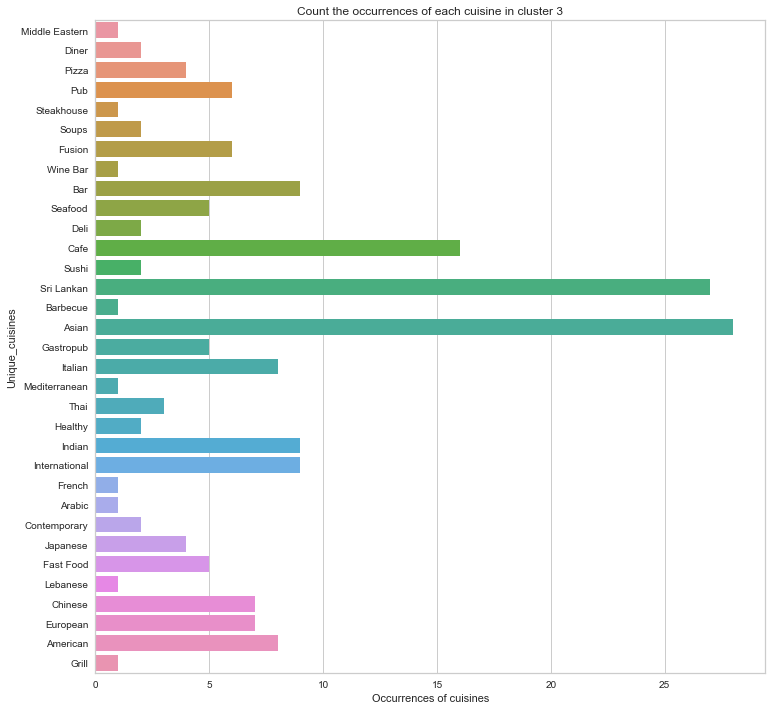

In [72]:
# Count the occurrences of each cuisine in cluster 3
cuisine_count = count(unique2_cuisines,'CUISINES',df2_kmeans)
# Create a dataframe for count & unique3_cuisines
df2_cuisines = pd.DataFrame()
df2_cuisines['unique_cuisines'] = unique2_cuisines
df2_cuisines['cuisine_count'] = cuisine_count
plt.figure(figsize=(12,12))
sns.barplot(x='cuisine_count',y='unique_cuisines',data = df2_cuisines)
plt.title('Count the occurrences of each cuisine in cluster 3')
plt.ylabel('Unique_cuisines')
plt.xlabel('Occurrences of cuisines')

> **Frequency of unique items in SPECIAL DIETS**

>  **Frequency of unique SPECIAL DIETS in Cluster 1**

Text(0.5,0,'Occurrences of SPECIAL_DIETS')

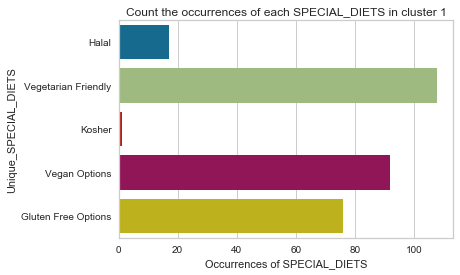

In [73]:
# Count the occurrences of each SPECIAL DIETS in cluster 1
SPECIAL_DIETS_count = count(unique0_SPECIAL_DIETS,'SPECIAL DIETS',df0_kmeans)
# Create a dataframe for count & unique1_SPECIAL DIETS
df0_SPECIAL_DIETS = pd.DataFrame()
df0_SPECIAL_DIETS['unique_SPECIAL_DIETS'] = unique0_SPECIAL_DIETS
df0_SPECIAL_DIETS['SPECIAL_DIETS_count'] = SPECIAL_DIETS_count
sns.barplot(x='SPECIAL_DIETS_count',y='unique_SPECIAL_DIETS',data = df0_SPECIAL_DIETS)
plt.title('Count the occurrences of each SPECIAL_DIETS in cluster 1')
plt.ylabel('Unique_SPECIAL_DIETS')
plt.xlabel('Occurrences of SPECIAL_DIETS')

> **Frequency of unique SPECIAL DIETS in Cluster 2**

Text(0.5,0,'Occurrences of SPECIAL_DIETS')

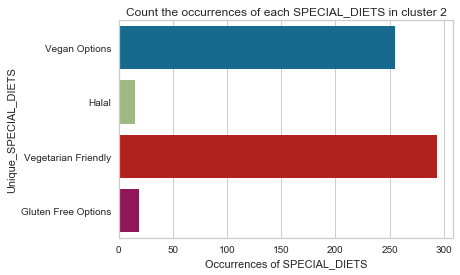

In [75]:
# Count the occurrences of each SPECIAL DIETS in cluster 2
SPECIAL_DIETS_count = count(unique1_SPECIAL_DIETS,'SPECIAL DIETS',df1_kmeans)
# Create a dataframe for count & unique2_SPECIAL DIETS
df1_SPECIAL_DIETS = pd.DataFrame()
df1_SPECIAL_DIETS['unique_SPECIAL_DIETS'] = unique1_SPECIAL_DIETS
df1_SPECIAL_DIETS['SPECIAL_DIETS_count'] = SPECIAL_DIETS_count
sns.barplot(x='SPECIAL_DIETS_count',y='unique_SPECIAL_DIETS',data = df1_SPECIAL_DIETS)
plt.title('Count the occurrences of each SPECIAL_DIETS in cluster 2')
plt.ylabel('Unique_SPECIAL_DIETS')
plt.xlabel('Occurrences of SPECIAL_DIETS')

>  **Frequency of unique SPECIAL DIETS in Cluster 3**

Text(0.5,0,'Occurrences of SPECIAL_DIETS')

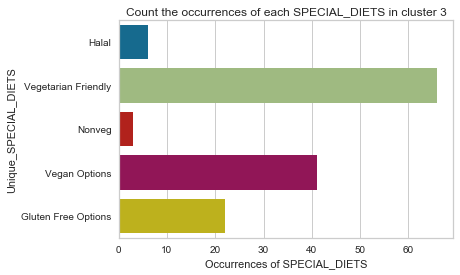

In [76]:
# Count the occurrences of each cuisine in cluster 3
SPECIAL_DIETS_count = count(unique2_SPECIAL_DIETS,'SPECIAL DIETS',df2_kmeans)
# Create a dataframe for count & unique3_cuisines
df2_SPECIAL_DIETS = pd.DataFrame()
df2_SPECIAL_DIETS['unique_SPECIAL_DIETS'] = unique2_SPECIAL_DIETS
df2_SPECIAL_DIETS['SPECIAL_DIETS_count'] = SPECIAL_DIETS_count
sns.barplot(x='SPECIAL_DIETS_count',y='unique_SPECIAL_DIETS',data = df2_SPECIAL_DIETS)
plt.title('Count the occurrences of each SPECIAL_DIETS in cluster 3')
plt.ylabel('Unique_SPECIAL_DIETS')
plt.xlabel('Occurrences of SPECIAL_DIETS')

>  **Frequency of unique items in Meals**

>  **Frequency of unique items in Meals in Cluster 1**

Text(0.5,0,'Occurrences of items in Meals')

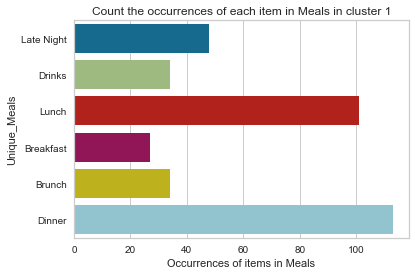

In [83]:
# Count the occurrences of each Meals in cluster 1
meals_count = count(unique0_Meals,'Meals',df0_kmeans)
# Create a dataframe for count & unique1_Meals
df0_Meals = pd.DataFrame()
df0_Meals['unique_Meals'] = unique0_Meals
df0_Meals['Meals_count'] = meals_count
sns.barplot(x='Meals_count',y='unique_Meals',data = df0_Meals)
plt.title('Count the occurrences of each item in Meals in cluster 1')
plt.ylabel('Unique_Meals')
plt.xlabel('Occurrences of items in Meals')

>  **Frequency of unique items in Meals in Cluster 2**

Text(0.5,0,'Occurrences of items in Meals')

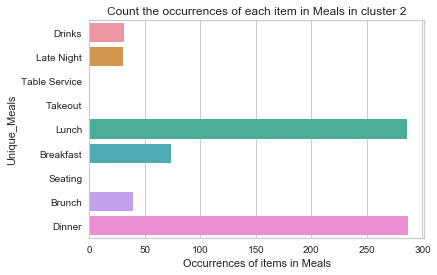

In [78]:
# Count the occurrences of each Meals in cluster 2
meals_count = count(unique1_Meals,'Meals',df1_kmeans)
# Create a dataframe for count & unique2_Meals
df1_Meals = pd.DataFrame()
df1_Meals['unique_Meals'] = unique1_Meals
df1_Meals['Meals_count'] = meals_count
sns.barplot(x='Meals_count',y='unique_Meals',data = df1_Meals)
plt.title('Count the occurrences of each item in Meals in cluster 2')
plt.ylabel('Unique_Meals')
plt.xlabel('Occurrences of items in Meals')

>  **Frequency of unique items in Meals in Cluster 3**

Text(0.5,0,'Occurrences of items in Meals')

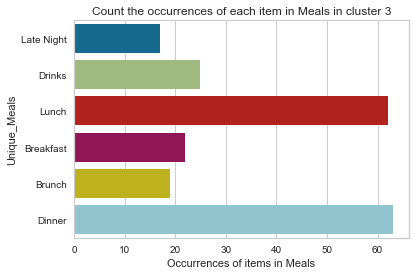

In [79]:
# Count the occurrences of each Meals in cluster 3
meals_count = count(unique2_Meals,'Meals',df2_kmeans)
# Create a dataframe for count & unique3_Meals
df2_Meals = pd.DataFrame()
df2_Meals['unique_Meals'] = unique2_Meals
df2_Meals['Meals_count'] = meals_count
sns.barplot(x='Meals_count',y='unique_Meals',data = df2_Meals)
plt.title('Count the occurrences of each item in Meals in cluster 3')
plt.ylabel('Unique_Meals')
plt.xlabel('Occurrences of items in Meals')

>  **Frequency of unique items in FEATURES**

>  **Frequency of unique items in FEATURES in Cluster 1**

Text(0.5,0,'Occurrences of items in FEATURES')

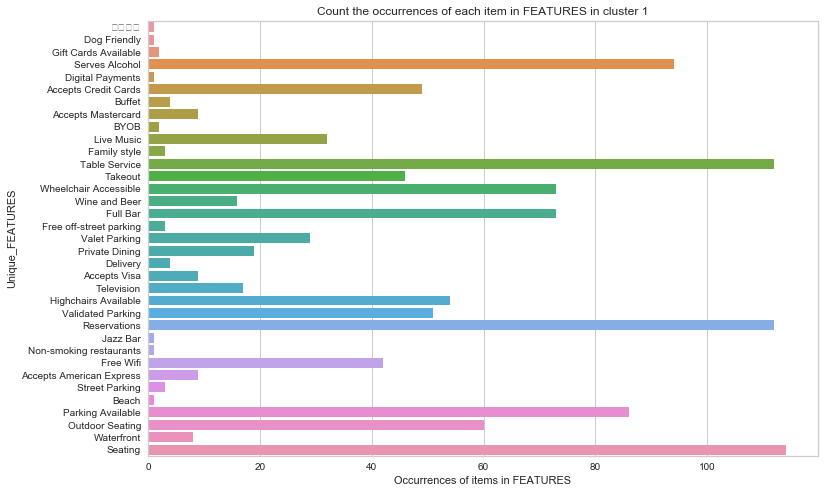

In [81]:
# Count the occurrences of each item in FEATURES in cluster 1
FEATURES_count = count(unique0_FEATURES,'FEATURES',df0_kmeans)
# Create a dataframe for count & unique1_FEATURES
df0_FEATURES = pd.DataFrame()
df0_FEATURES['unique_FEATURES'] = unique0_FEATURES
df0_FEATURES['FEATURES_count'] = FEATURES_count
plt.figure(figsize=(12,8))
sns.barplot(x='FEATURES_count',y='unique_FEATURES',data = df0_FEATURES)
plt.title('Count the occurrences of each item in FEATURES in cluster 1')
plt.ylabel('Unique_FEATURES')
plt.xlabel('Occurrences of items in FEATURES')

>  **Frequency of unique items in FEATURES in Cluster 2**

Text(0.5,0,'Occurrences of items in FEATURES')

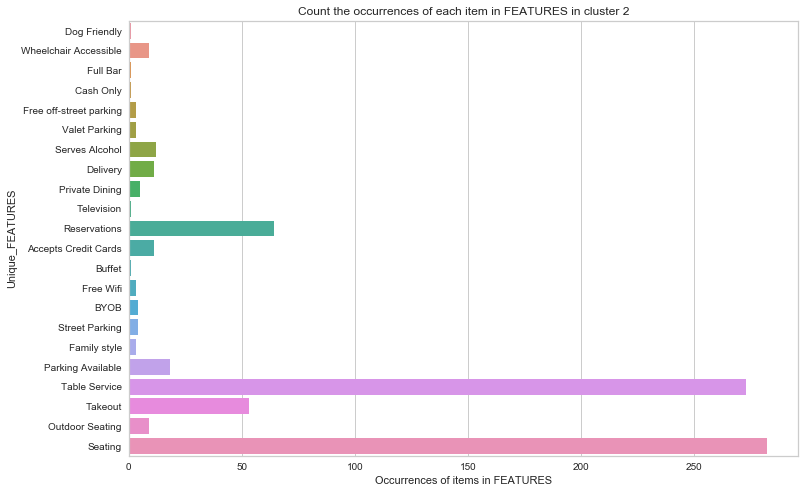

In [84]:
# Count the occurrences of each item in FEATURES in cluster 2
FEATURES_count = count(unique1_FEATURES,'FEATURES',df1_kmeans)
# Create a dataframe for count & unique1_FEATURES
df1_FEATURES = pd.DataFrame()
df1_FEATURES['unique_FEATURES'] = unique1_FEATURES
df1_FEATURES['FEATURES_count'] = FEATURES_count
plt.figure(figsize=(12,8))
sns.barplot(x='FEATURES_count',y='unique_FEATURES',data = df1_FEATURES)
plt.title('Count the occurrences of each item in FEATURES in cluster 2')
plt.ylabel('Unique_FEATURES')
plt.xlabel('Occurrences of items in FEATURES')

>  **Frequency of unique items in FEATURES in Cluster 3**

Text(0.5,0,'Occurrences of items in FEATURES')

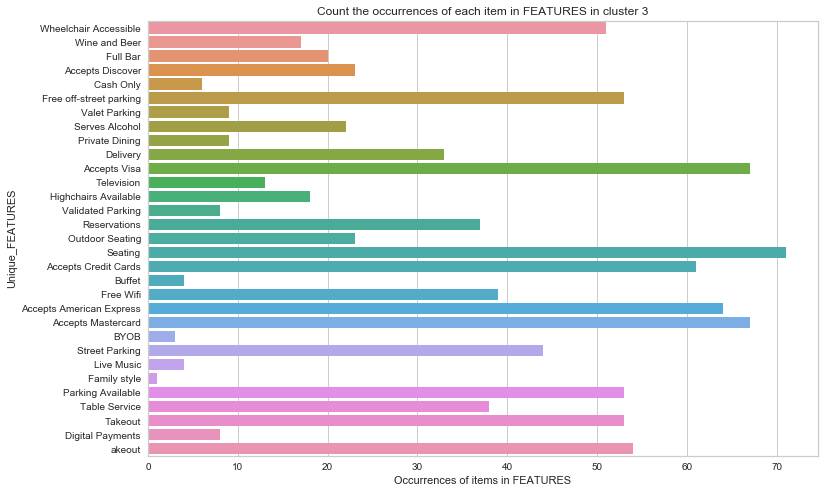

In [85]:
# Count the occurrences of each item in FEATURES in cluster 3
FEATURES_count = count(unique2_FEATURES,'FEATURES',df2_kmeans)
# Create a dataframe for count & unique3_FEATURES
df2_FEATURES = pd.DataFrame()
df2_FEATURES['unique_FEATURES'] = unique2_FEATURES
df2_FEATURES['FEATURES_count'] = FEATURES_count
plt.figure(figsize=(12,8))
sns.barplot(x='FEATURES_count',y='unique_FEATURES',data = df2_FEATURES)
plt.title('Count the occurrences of each item in FEATURES in cluster 3')
plt.ylabel('Unique_FEATURES')
plt.xlabel('Occurrences of items in FEATURES')

>  **Frequency of Budget classes**

In [86]:
unique_budget = df_new['Budget'].unique()

>  **Frequency of Budget classes in Cluster 1**

Text(0,0.5,'Count')

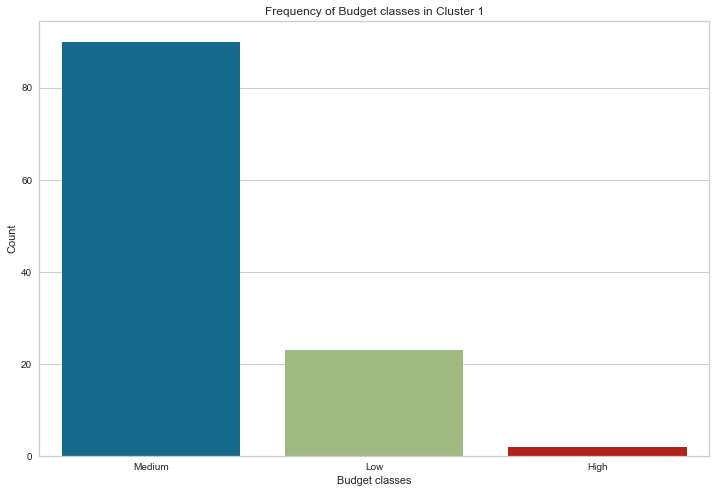

In [87]:
plt.figure(figsize=(12,8))
sns.countplot(df0_kmeans['Budget'])
plt.title('Frequency of Budget classes in Cluster 1')
plt.xlabel('Budget classes')
plt.ylabel('Count')

>  **Frequency of Budget classes in Cluster 2**

Text(0,0.5,'Count')

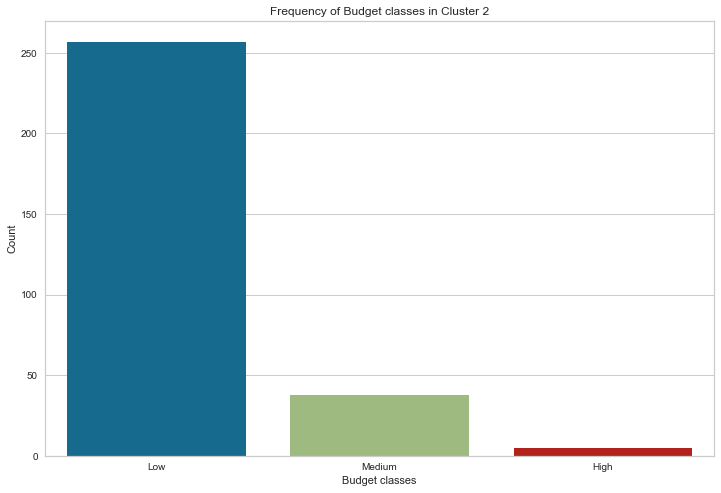

In [88]:
plt.figure(figsize=(12,8))
sns.countplot(df1_kmeans['Budget'])
plt.title('Frequency of Budget classes in Cluster 2')
plt.xlabel('Budget classes')
plt.ylabel('Count')

>  **Frequency of Budget classes in Cluster 3**

Text(0,0.5,'Count')

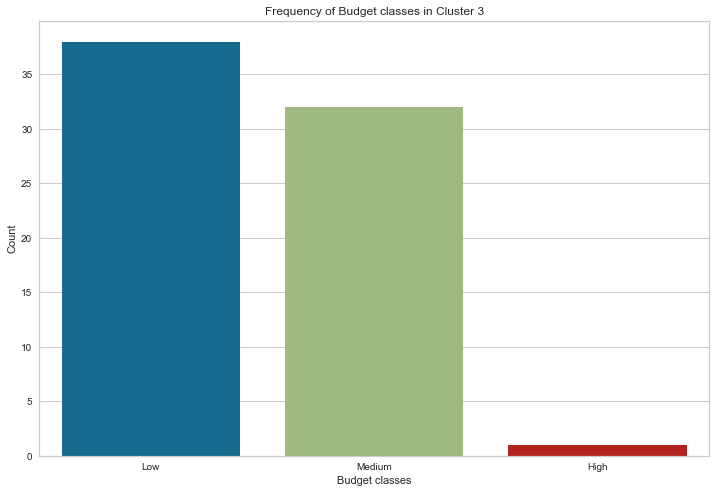

In [89]:
plt.figure(figsize=(12,8))
sns.countplot(df2_kmeans['Budget'])
plt.title('Frequency of Budget classes in Cluster 3')
plt.xlabel('Budget classes')
plt.ylabel('Count')

## Restaurant maps for each cluster using Folium

>  **Here,we are creating folium maps which are centered around Colombo, Sri Lanka.**

> **Create a folium map centered around Colombo, Srilanka**

In [378]:
# Geo co-ordinates for Colombo
lat_colombo = 6.9271
long_colombo =79.8612

Colombo_map=folium.Map(location=[lat_colombo,long_colombo],zoom_start=13)
folium.features.Marker(
(lat_colombo,long_colombo),
popup='Colombo, Capital of Sri Lanka',
icon=folium.Icon(color='red',icon_color='white',icon='male',angle=0,prefix='fa')).add_to(Colombo_map)
Colombo_map

In [379]:
#Create a list of latitude & longitude pairs for all Restaurants in Cluster 1
location_c1=df0_kmeans[['Latitude','Longitude']]
locationlist_c1=location_c1.values.tolist()
locationlist_c1[0]

[6.8929346, 79.8639527]

> **Explore all Restaurants in cluster 1 around Colombo.**

In [380]:

for point in range(0,len(locationlist_c1)):
    folium.features.Marker(
    locationlist_c1[point],
    popup=df0_kmeans['Name'][point]+', '+ df0_kmeans['CUISINES'][point]+', '+df0_kmeans['SPECIAL DIETS'][point],
    icon=folium.Icon(color='darkblue',icon_color='white',icon='male',angle=0,prefix='fa')
    ).add_to(Colombo_map)
Colombo_map

In [381]:
#Create a list of latitude & longitude pairs for all Restaurants in Cluster 2
location_c2=df1_kmeans[['Latitude','Longitude']]
locationlist_c2=location_c2.values.tolist()
locationlist_c2[0]

[6.0333469, 80.2144181]

> **Explore all Restaurants in cluster 2 around Colombo.**

In [382]:
for point in range(0,len(locationlist_c2)):
    folium.features.Marker(
    locationlist_c2[point],
    popup=df1_kmeans['Name'][point]+', '+ df1_kmeans['CUISINES'][point]+', '+df1_kmeans['SPECIAL DIETS'][point],
    icon=folium.Icon(color='darkblue',icon_color='white',icon='male',angle=0,prefix='fa')
    ).add_to(Colombo_map)
Colombo_map

In [383]:
#Create a list of latitude & longitude pairs for all Restaurants in Cluster 3
location_c3=df2_kmeans[['Latitude','Longitude']]
locationlist_c3=location_c3.values.tolist()
locationlist_c3[0]

[6.9203009, 79.846261]

> **Explore all Restaurants in cluster 3 around Colombo.**

In [384]:
for point in range(0,len(locationlist_c3)):
    folium.features.Marker(
    locationlist_c3[point],
    popup=df2_kmeans['Name'][point]+', '+ df2_kmeans['CUISINES'][point]+', '+df2_kmeans['SPECIAL DIETS'][point],
    icon=folium.Icon(color='darkblue',icon_color='white',icon='male',angle=0,prefix='fa')
    ).add_to(Colombo_map)
Colombo_map

## Characterstics of each Cluster

> **Some characteristics are unique (shown in bold & italic letters) & some are common among all clusers. Here the order in which the CUISINES, SPECIAL DIETS, Meals, & FEATURES are mentioned is descending based on their occurrencies in respective clusters. High occurrencies of items in CUISINES, SPECIAL DIETS, Meals, & FEATURES are only considered for each cluster.**

## Cluster 1

* CUISINES : Asian, Bar, Sri Lankan, Chinise, Pub, Indian, Seafood, European, International,Fusion

* SPECIAL DIETS : Vegetarian Friendly, Vegan options, Gluten Free options.

* Meals : Dinner, Lunch, Latenight.

* FEATURES : Seating, Table service, Reservations, Takeout, Parking available, Serves Alcohol, Outdoor seating, Accepts Credit cards, Wheelchair Accessible, Highchairs Available, Full Bar, Free Wifi, validated Parking.
* Budget : Medium, Low, High

## Cluster 2

* CUISINES : Asian, Sri Lankan, Indian, Chinise, Italin, Cafe.

* SPECIAL DIETS : Vegetarian Friendly, Vegan options.

* Meals : Dinner, Lunch, Breakfast.

* FEATURES : Seating, Table service, Reservations, Takeout.
* Budget : Low, Medium, High.

## Cluster 3

* CUISINES : Asian, European, Bar, Sri Lankan, Pub, International, American, Chinese, Fusion, Cafe, Indian, Italian.

* SPECIAL DIETS : Vegetarian Friendly, Vegan options, Gluten Free options.

* Meals : Dinner, Lunch, Breakfast, Drinks

* FEATURES : Seves Alcohol, Seating, Reservations, Table Service, Wheelchair Accessible, Parking available, Highchairs Available, Accepts American Express, Aceepts Visa, Aceepts Credit Cards, Free Wifi, Street Parking, Accepts Master Card.
* Budget : Medium, Low, High.

Compare Elbow method and Silhouette coefficient 

The Elbow Method is more of a decision rule, while the Silhouette coefficient is a metric used for validation while clustering. Thus, it can be used in combination with the Elbow Method.
Therefore, the Elbow Method and the Silhouette Method are not alternatives to each other for finding the optimal K. Rather they are tools to be used together for a more confident decision.

We got 3 or 4 optimal clusters for Elbow method and 3 optimal clusters for silhouette coefficient method. So, final optimal clusters is 3.